In [1]:
#Install the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')



In [2]:
students = pd.read_csv('student_exam_scores.csv')
students.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [3]:
#Shape of the dataset
students.shape

(200, 6)

In [4]:
#Info about the dataset
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [5]:
#Summary statistics
students.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [6]:
#check for missing values
students.isnull().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

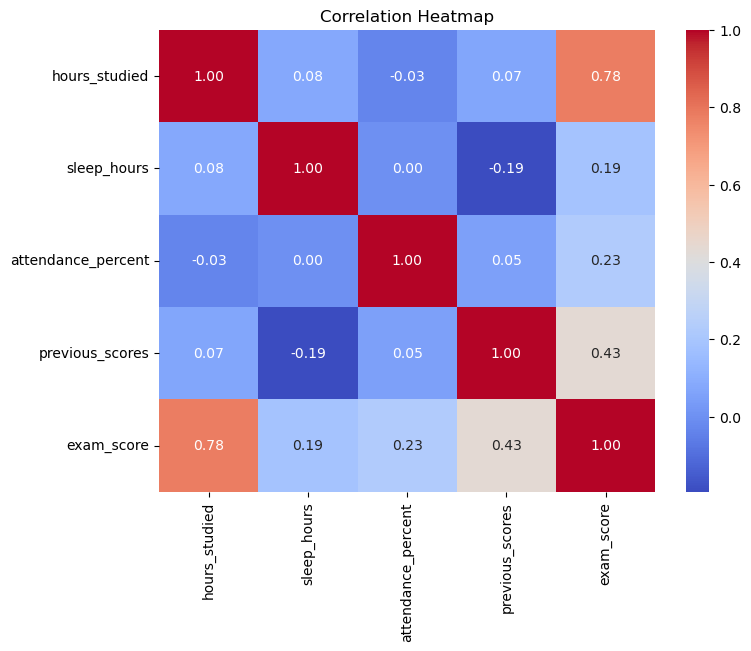

In [7]:
# Select only numeric columns
numeric_data = students.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Exploratory Data Analysis

### Distribution Analysis

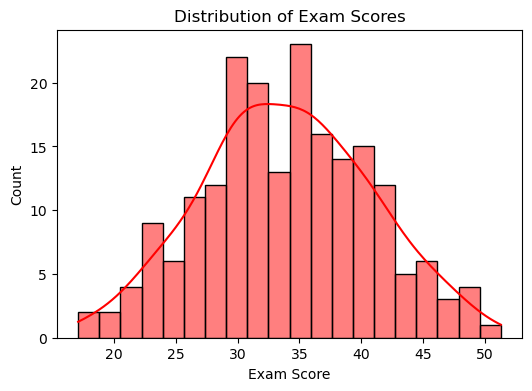

In [15]:
# Histogram of exam scores
plt.figure(figsize=(6,4))
sns.histplot(students['exam_score'], bins=20, color='red' ,kde=True)
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()

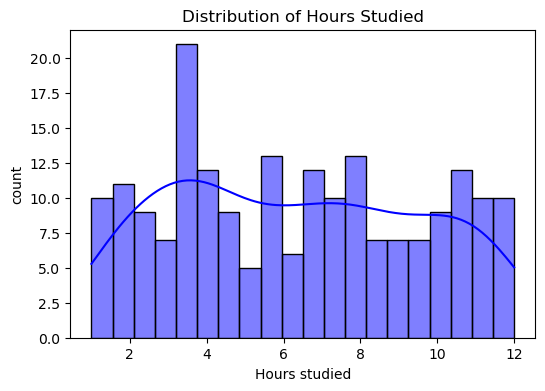

In [16]:
#Distribution of hours studied
plt.figure(figsize=(6,4))
sns.histplot(students['hours_studied'], bins=20, color='blue', kde=True)
plt.title("Distribution of Hours Studied")
plt.xlabel("Hours studied")
plt.ylabel("count")
plt.show()

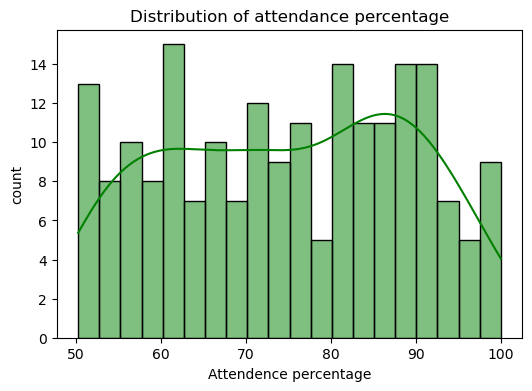

In [17]:
#Distribution of Attendance 
plt.figure(figsize=(6,4))
sns.histplot(students['attendance_percent'],bins=20,color='green',kde=True)
plt.title("Distribution of attendance percentage")
plt.xlabel("Attendence percentage")
plt.ylabel("count")
plt.show()

####  Relationship Analysis

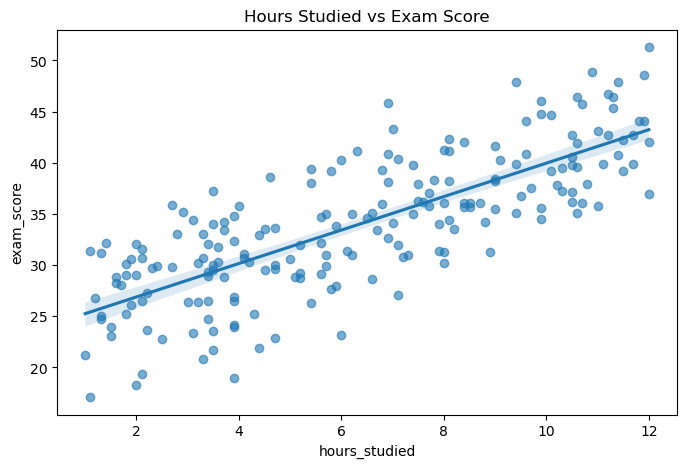

In [18]:
# Hours studied vs exam score
plt.figure(figsize=(8,5))
sns.regplot(x='hours_studied', y='exam_score', data=students, scatter_kws={'alpha':0.6})
plt.title("Hours Studied vs Exam Score")
plt.show()

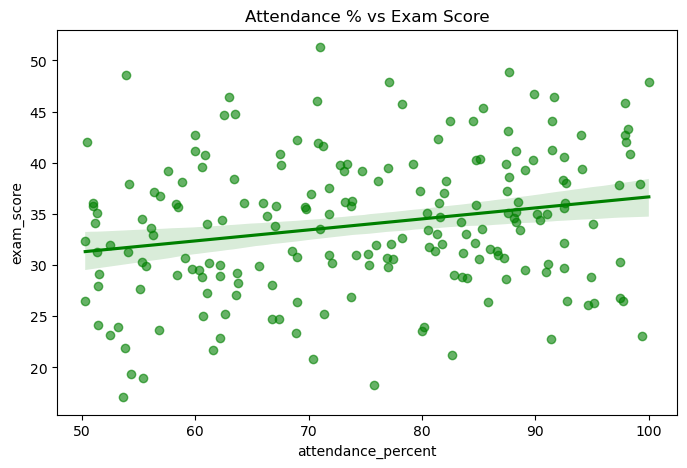

In [19]:
# Attendance vs exam score
plt.figure(figsize=(8,5))
sns.regplot(x='attendance_percent', y='exam_score', data=students, scatter_kws={'alpha':0.6}, color="green")
plt.title("Attendance % vs Exam Score")
plt.show()

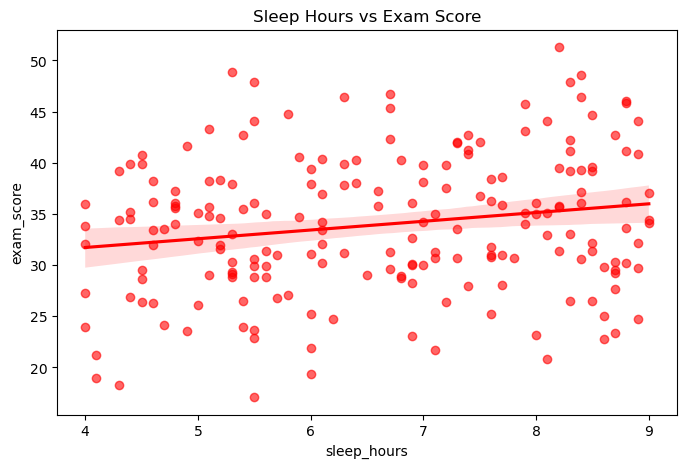

In [20]:
# Sleep hours vs exam score
plt.figure(figsize=(8,5))
sns.regplot(x='sleep_hours', y='exam_score', data=students, scatter_kws={'alpha':0.6}, color="red")
plt.title("Sleep Hours vs Exam Score")
plt.show()

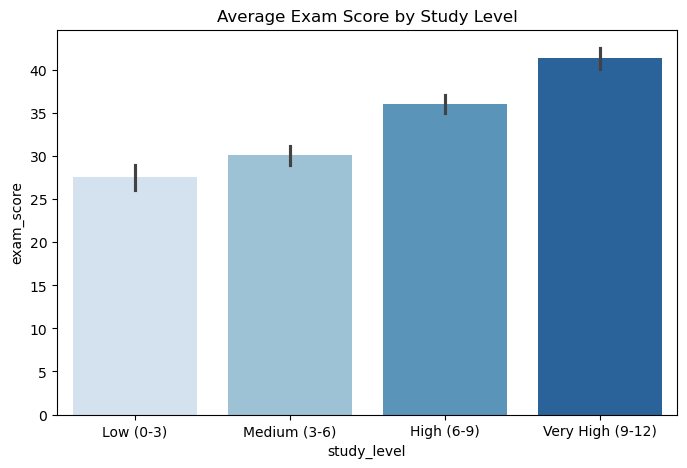

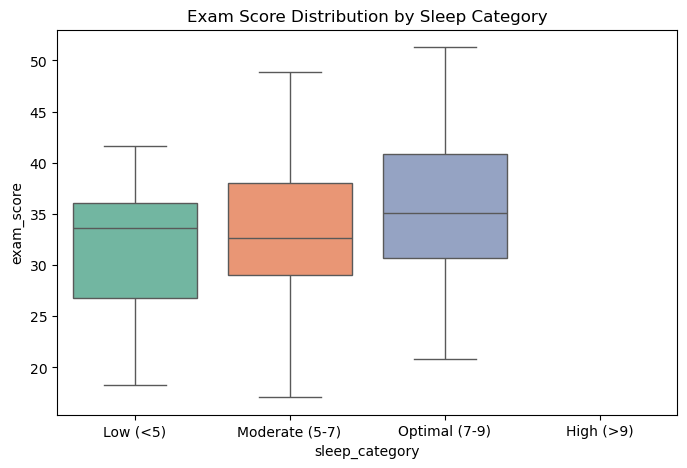

In [21]:
# Categorize students by hours studied
students['study_level'] = pd.cut(students['hours_studied'], 
                                 bins=[0,3,6,9,12], 
                                 labels=['Low (0-3)', 'Medium (3-6)', 'High (6-9)', 'Very High (9-12)'])

# Average exam score per study group
plt.figure(figsize=(8,5))
sns.barplot(x='study_level', y='exam_score', data=students, estimator=np.mean, palette="Blues")
plt.title("Average Exam Score by Study Level")
plt.show()

# Sleep category
students['sleep_category'] = pd.cut(students['sleep_hours'],
                                    bins=[0,5,7,9,12],
                                    labels=['Low (<5)', 'Moderate (5-7)', 'Optimal (7-9)', 'High (>9)'])

plt.figure(figsize=(8,5))
sns.boxplot(x='sleep_category', y='exam_score', data=students, palette="Set2")
plt.title("Exam Score Distribution by Sleep Category")
plt.show()


### Modelling

#### Split Data into Train/Test

In [22]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = students[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']]
y = students['exam_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression Performance:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression Performance:
R2 Score: 0.8537447137159518
MAE: 2.3108582358958327
RMSE: 2.7859976074331194


#### Random Forest

In [24]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Performance:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Performance:
R2 Score: 0.7922296358966725
MAE: 2.9697999999999993
RMSE: 3.3206014515445843


#### XGBoost

In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Performance metrics
print("XGBoost Performance:")
print("R2 Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


XGBoost Performance:
R2 Score: 0.7971745062757476
MAE: 2.9559930229187015
RMSE: 3.280848858831422


#### visual comparison of predictions (actual vs predicted)

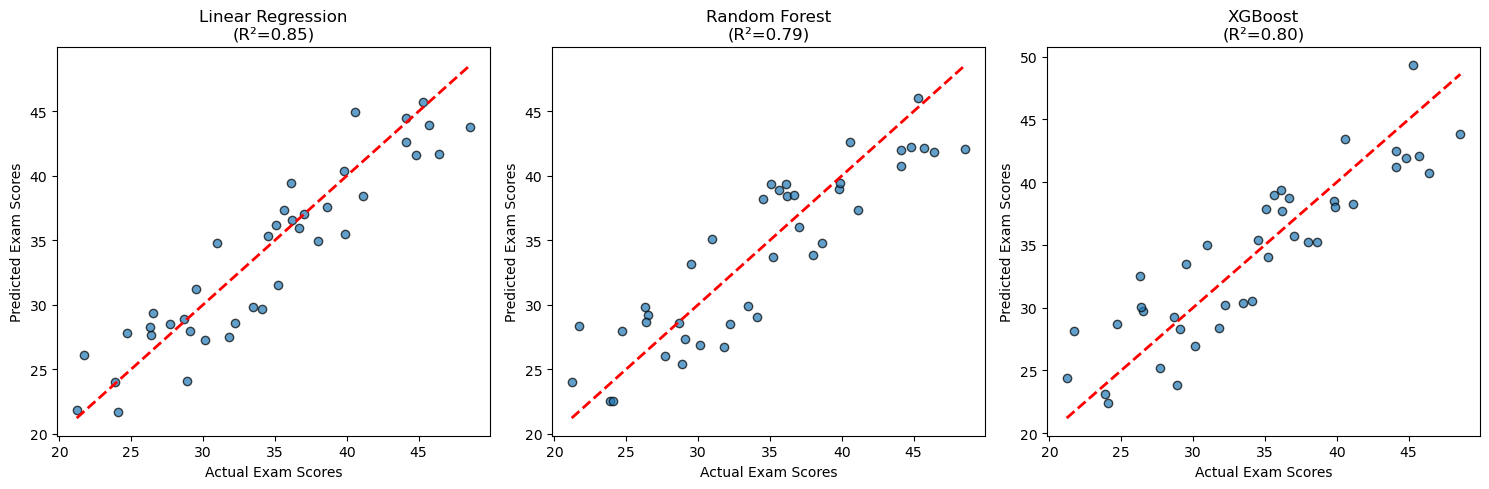

In [26]:


# Collect predictions
preds = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

plt.figure(figsize=(15,5))

for i, (model_name, y_pred) in enumerate(preds.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # ideal line
    plt.xlabel("Actual Exam Scores")
    plt.ylabel("Predicted Exam Scores")
    plt.title(f"{model_name}\n(R²={r2_score(y_test, y_pred):.2f})")

plt.tight_layout()
plt.show()


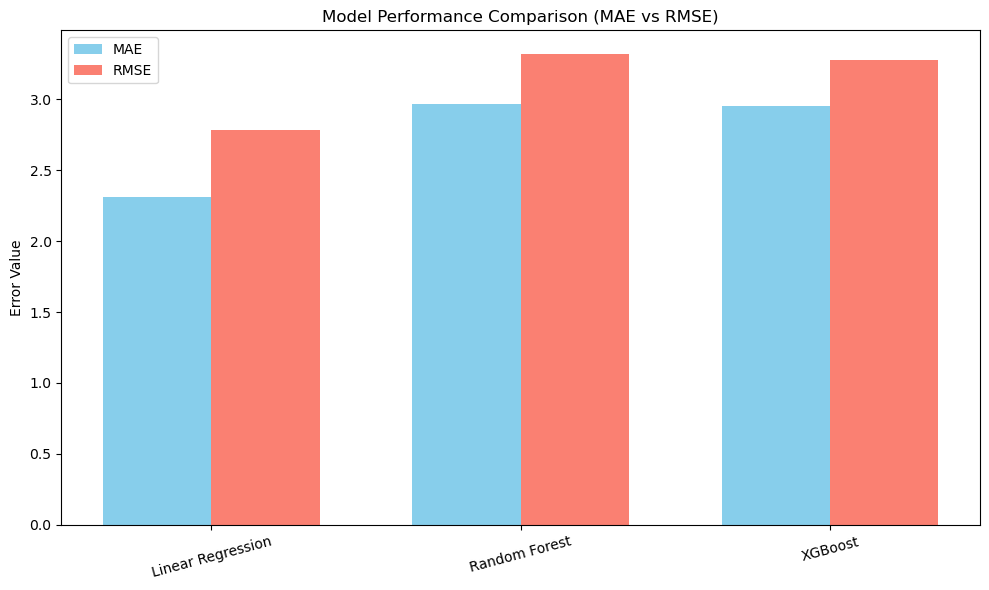

In [ ]:

# Metrics
mae_scores = [
    mean_absolute_error(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_xgb)
]

rmse_scores = [
    np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    np.sqrt(mean_squared_error(y_test, y_pred_xgb))
]

models = ["Linear Regression", "Random Forest", "XGBoost"]

x = np.arange(len(models))  # model positions
width = 0.35  # bar width

plt.figure(figsize=(10,6))

# MAE bars
plt.bar(x - width/2, mae_scores, width, label="MAE", color="skyblue")

# RMSE bars
plt.bar(x + width/2, rmse_scores, width, label="RMSE", color="salmon")

plt.xticks(x, models, rotation=15)
plt.ylabel("Error Value")
plt.title("Model Performance Comparison (MAE vs RMSE)")
plt.legend()
plt.tight_layout()
plt.show()


#### Feature Importance 

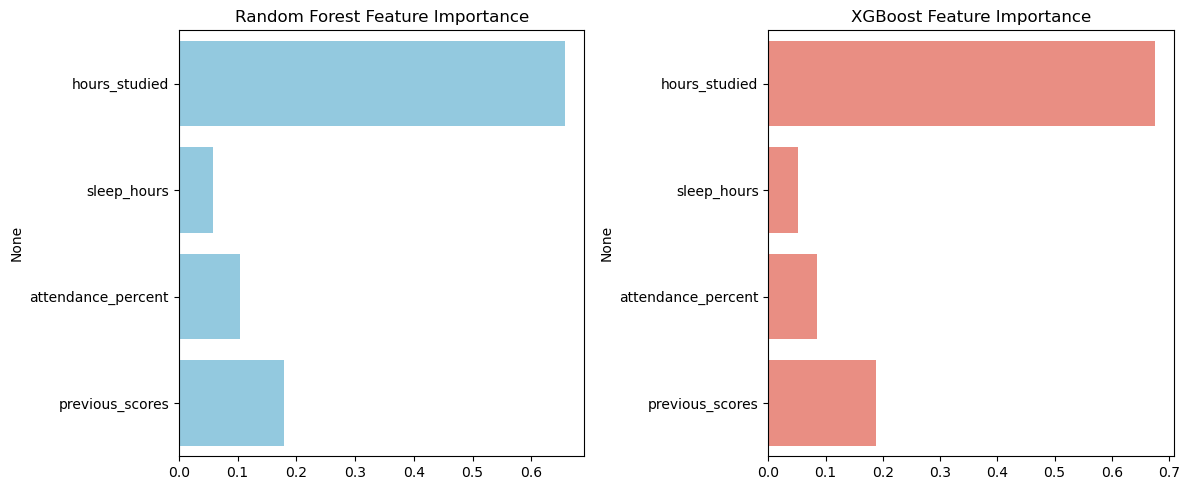

In [28]:
# Feature importance from Random Forest
rf_importances = rf.feature_importances_
xgb_importances = xgb.feature_importances_

features = X_train.columns

plt.figure(figsize=(12,5))

# Random Forest
plt.subplot(1, 2, 1)
sns.barplot(x=rf_importances, y=features, color="skyblue")
plt.title("Random Forest Feature Importance")

# XGBoost
plt.subplot(1, 2, 2)
sns.barplot(x=xgb_importances, y=features, color="salmon")
plt.title("XGBoost Feature Importance")

plt.tight_layout()
plt.show()
